In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftn, ifftn, fftshift, ifftshift
import time
import os
import waveorder as wo

import zarr


%matplotlib inline
plt.style.use(['dark_background']) # Plotting option for dark background


In [ ]:
# Code to load your fluorescence images




## Setup experimental parameters

In [4]:
# Basic parameter 
N_channel, N, M, N_defocus = I_fluor.shape
ps_f                       = 6.9/60         # effective pixel size at the sample plane (cam pix/mag in um)
psz                        = 0.3            # z-step size of the defocused intensity stack (in um)
n_media                    = 1.33           # refractive index of the immersed media for objective (oil: 1.512, water: 1.33, air: 1)
lambda_emiss               = [0.46, 0.515]  # emission wavelength of the fluorescence channel (list, in um)
NA_obj                     = 1.2            # detection NA of the objective


## 2D Deconvolution

In [16]:
fluor_setup = wo.fluorescence_microscopy((N_fluor, M_fluor, N_defocus_fluor), lambda_emiss, ps_f, psz, NA_obj, 
                                         n_media=n_media, deconv_mode='2D-WF', pad_z=10, use_gpu=True, gpu_id=0)

In [22]:
bg_fluor = [11000,2000]
reg = [1e-3, 1e-3]

I_fluor_deconv = fluor_setup.deconvolve_fluor_2D(I_fluor[:,:,:,30], bg_fluor, reg=reg)

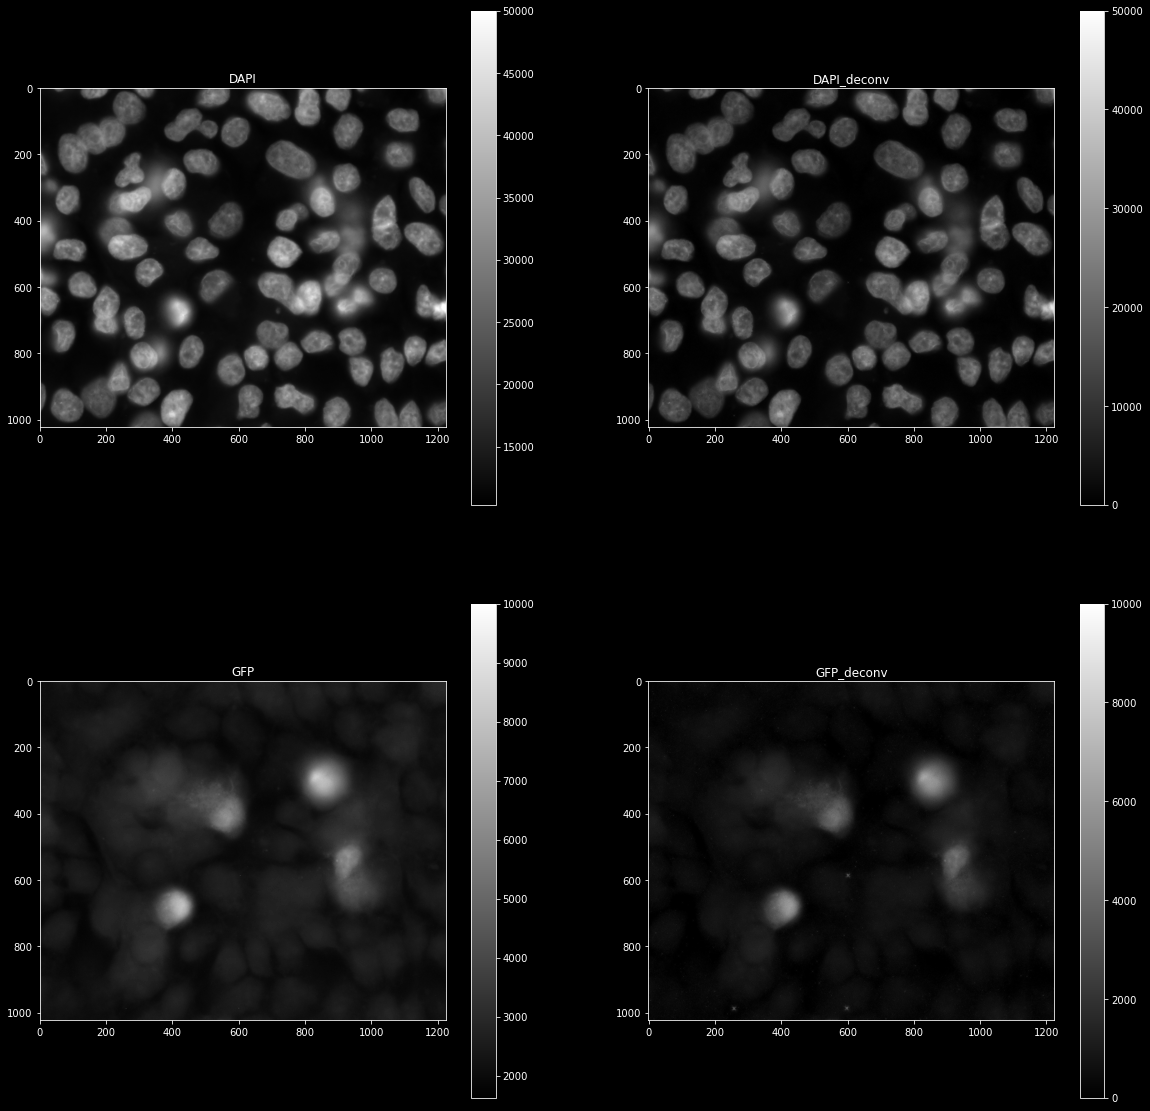

In [23]:
wo.plot_multicolumn([np.clip(I_fluor[0,:,:,30],0,5e4),np.clip(I_fluor_deconv[0],0,5e4),
                     np.clip(I_fluor[1,:,:,30],0,1e4),np.clip(I_fluor_deconv[1],0,1e4)],
                    set_title=True, titles=['DAPI', 'DAPI_deconv', 'GFP', 'GFP_deconv'])

## 3D Deconvolution

In [5]:
fluor_setup = wo.fluorescence_microscopy((N_fluor, M_fluor, N_defocus_fluor), lambda_emiss, ps_f, psz, NA_obj, 
                                         n_media=n_media, deconv_mode='3D-WF', pad_z=10, use_gpu=True, gpu_id=0)

In [7]:
bg_fluor = [11000,2000]
reg = [1e-2, 1e-2]

I_fluor_deconv = fluor_setup.deconvolve_fluor_3D(I_fluor, bg_fluor, reg=reg)

In [11]:
wo.parallel_4D_viewer(np.transpose(np.stack([np.clip(I_fluor[0],0,5e4), np.clip(I_fluor_deconv[0],0,5e4), np.clip(I_fluor[1],0,1e4),np.clip(I_fluor_deconv[1],0,1e4)]),(3,0,1,2)), num_col=2, origin='lower', 
                      set_title=True, titles=['DAPI','DAPI_deconv', 'GFP', 'GFP_deconv'], size=10)

interactive(children=(IntSlider(value=0, description='stack_idx', max=55), Output()), _dom_classes=('widget-in…

<function waveorder.visual.parallel_4D_viewer.<locals>.interact_plot(stack_idx)>

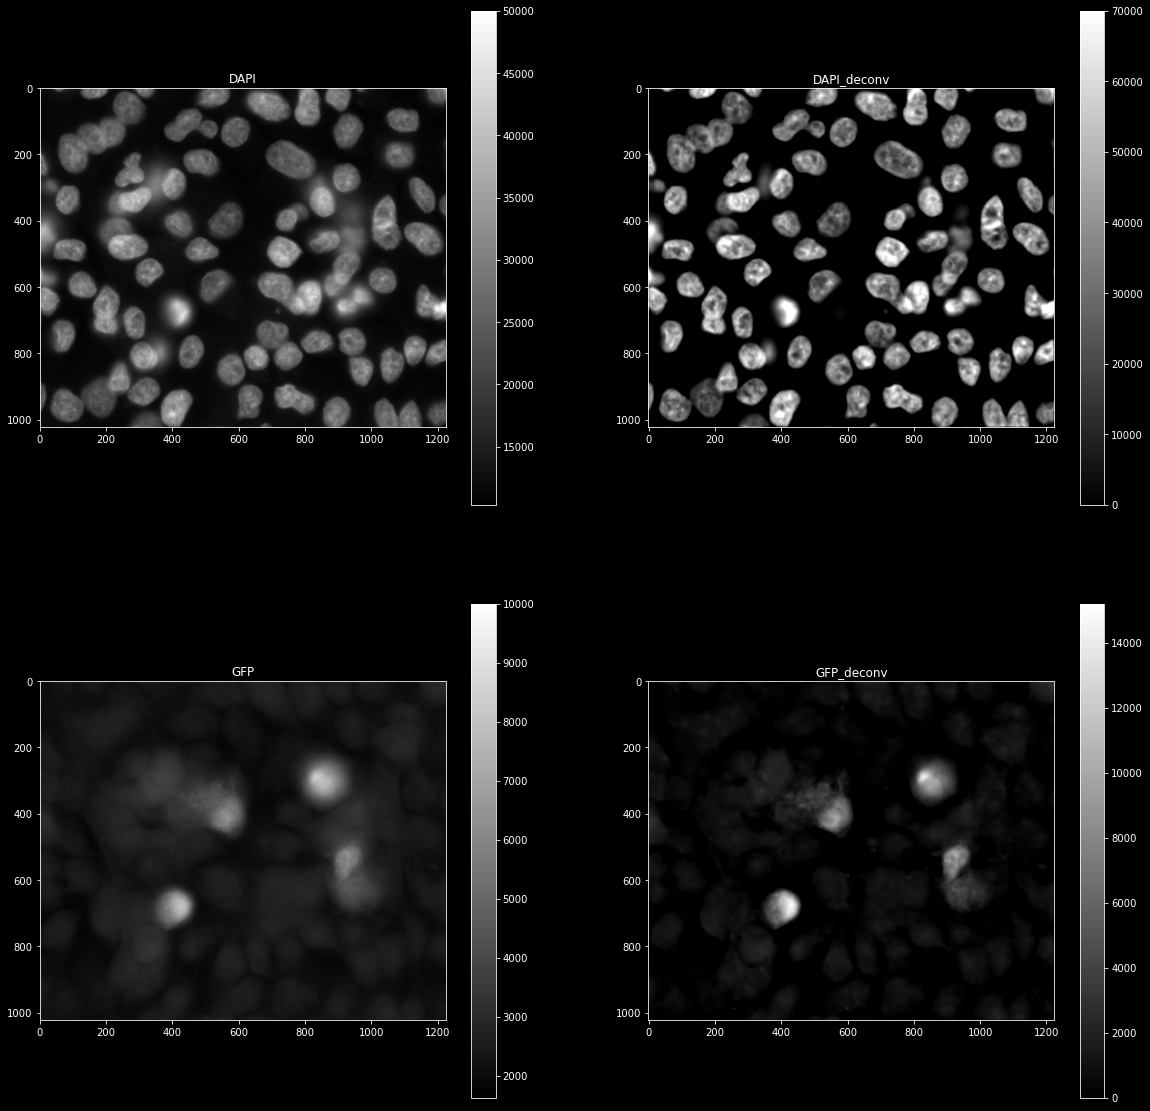

In [15]:
wo.plot_multicolumn([np.clip(I_fluor[0,:,:,30],0,5e4),np.clip(I_fluor_deconv[0,:,:,30],0,7e4),
                     np.clip(I_fluor[1,:,:,30],0,1e4),np.clip(I_fluor_deconv[1,:,:,30],0,2e4)],
                    set_title=True, titles=['DAPI', 'DAPI_deconv', 'GFP', 'GFP_deconv'])